For my solo exploration, I want to look at different countries over time and compare their total consumpiton of electric power in thousands of kW per year. I also want to show how much of that total consumption is produceed by means of nuclear power.   

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Read only data rows into the dataframes. 

In [3]:
total_electricity = pd.read_csv('../data/total_electricity.csv',nrows=100000) #Contains the total electricty consumption of each contry for each year
nuclear_electricity = pd.read_csv('../data/nuclear_electricity.csv',nrows=915) #Contains the total nuclear 

Drop the footnotes column for cleaner look. Check the data types of each of the columns. 

In [4]:
total_electricity = total_electricity.drop(columns=['Quantity Footnotes'])

total_electricity_consumption = total_electricity[(total_electricity['Commodity - Transaction'] == 'Electricity - Final energy consumption')]
nuclear_electricity_production = nuclear_electricity.drop(columns=['Quantity Footnotes'])

print('Total Electricity:\n',total_electricity.dtypes,'\n\nNuclear Electricity:\n',nuclear_electricity.dtypes)

Total Electricity:
 Country or Area             object
Commodity - Transaction     object
Year                         int64
Unit                        object
Quantity                   float64
dtype: object 

Nuclear Electricity:
 Country or Area             object
Commodity - Transaction     object
Year                         int64
Unit                        object
Quantity                   float64
Quantity Footnotes         float64
dtype: object


Lets first look at the total electricity consumption for each country in a recent year with adequate data, 2019. This way we can estimate countries with the highest engergy consumptions. 

In [5]:
total_electricity_consumption_2019 = total_electricity_consumption[total_electricity_consumption['Year'] == 2019]
total_nuclear_production_2019 = nuclear_electricity_production[nuclear_electricity_production['Year'] == 2019]


In [6]:
#Merge those into one datafeame for future use
electricity_merged_2019 = total_electricity_consumption_2019.merge(total_nuclear_production_2019, left_on = 'Country or Area', right_on = 'Country or Area')
#Change the Column Names and clean up data
electricity_merged_2019 = (electricity_merged_2019
                            .rename(columns = {'Quantity_x':'Total Electricity Consumption','Quantity_y':'Total Nuclear Electricity Production','Year_y':'Year'})
                            .drop(columns = ['Commodity - Transaction_x','Year_x','Commodity - Transaction_y'])
                        )


In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Set floats to 2 decimal points
total_electricity_consumption_2019['Quantity'].describe() #Summary stats on the Electric consumption 2019


count       125.00
mean     110837.11
std      584041.16
min          17.80
25%         635.00
50%        6484.17
75%       30930.00
max     6298689.00
Name: Quantity, dtype: float64

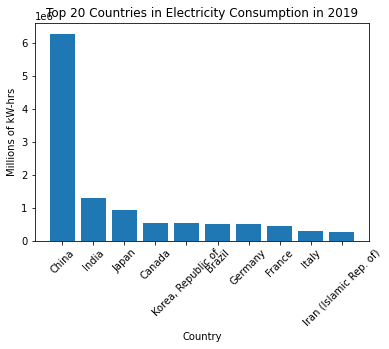

In [8]:
#This will give the top 10 consumers of elctricity for the year 2019, we just want a glimpse of some of the top countries
fig_1_data = total_electricity_consumption_2019.sort_values(by=['Quantity'], ascending=False).iloc[0:10,:]

# plt.rcParams["figure.figsize"] = (60, 30)
# plt.rcParams.update({'font.size':40})


plt.bar(fig_1_data['Country or Area'],fig_1_data['Quantity'])
plt.xticks(rotation = 45)
plt.xlabel('Country')
plt.ylabel('Millions of kW-hrs')
plt.title('Top 20 Countries in Electricity Consumption in 2019')
plt.show()


In [9]:
print('Top ten countries in enrgy consumption in 2019: \n', fig_1_data['Country or Area'])

Top ten countries in enrgy consumption in 2019: 
 32145                     China
74863                     India
83574                     Japan
28249                    Canada
89034        Korea, Republic of
21695                    Brazil
62077                   Germany
56743                    France
81215                     Italy
76591    Iran (Islamic Rep. of)
Name: Country or Area, dtype: object


For some reason, The US which is a top consumer of electricity, is not showing up on my list. I believe this was an issue with the original UN data categories. They were not included in the UN in the Final consumtion - Energy category for some reason.  

Now that we have an idea of which countries consume a majority of the electricity, we will use those in the top 10 that also produce nuclear electricity to compare these values. I imagine that most of these countries still produce a majority of their energy from coal and other sources so these should relatively low values compared to their total consumption. 

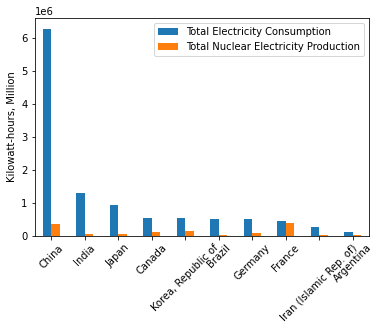

In [10]:
figure_2_data = (electricity_merged_2019
                    .sort_values(by = 'Total Electricity Consumption', ascending=False)
                    .iloc[0:10,:]
                )
#Grouped bar chart
figure_2_data[['Total Electricity Consumption','Total Nuclear Electricity Production']].plot(kind='bar')

# plt.rcParams["figure.figsize"] = (60, 30)
# plt.rcParams.update({'font.size':40})

plt.xticks(ticks = range(0,10), labels = figure_2_data['Country or Area'], rotation = 45)
plt.ylabel('Kilowatt-hours, Million')
plt.legend()
plt.show()


Now lets look at these trends over a period of time to see the growth in nuclear electricity production. 

In [11]:
#Merge those into one datafeame for future use
electricity_merged = total_electricity_consumption.merge(nuclear_electricity_production, left_on = 'Country or Area', right_on = 'Country or Area')
#Change the Column Names and clean up data
electricity_merged = (electricity_merged
                    .rename(columns = {'Quantity_x':'Total Electricity Consumption','Quantity_y':'Total Nuclear Electricity Production','Year_y':'Year'})
                    .drop(columns = ['Commodity - Transaction_x','Year_x','Commodity - Transaction_y'])
                    )


This is the library for animated bar charts over time

In [12]:
import bar_chart_race as bcr

We need to make our data wide instead of long, where each country is coulumn and each row is the year. Lets look again at the top consumers of electricity for 2019 just to narrow down the scope of our graph. We will do this with pivot table. 

In [13]:
table = electricity_merged.pivot_table(
                                index = 'Year',
                                columns = 'Country or Area',
                                values = 'Total Nuclear Electricity Production'
                                )
table = (table
        .loc[:,figure_2_data['Country or Area']]
        .fillna(0)
        .drop(2020)#Not enough data for this year 
        )

In [14]:
bcr.bar_chart_race(df = table, title = 'Nuclear Electricity Production over Time (kW-hrs, million)', 
                figsize = (6, 3.5),
                bar_size=.95
                )

c:\Users\jacks\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
c:\Users\jacks\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


https://world-nuclear.org/information-library/country-profiles.aspx - More info on nuclear programs in different countries. 

France seems to have been the leader in nuclear energy production since 1990. I did some research and found out that since 1973, they have had governmnet requirements for a majority of their electricity to be produced by means of nuclear power plants. They have over 56 nuclear reactors today and are leaders in electricity export. France derives about 70% of its own electricity from nuclear energy today. 

As you can see at the end of the animation, China's nuclear program is also on the rise. They plan to have over 130 new power plants installed by the year 2035, aiming for a closed loop power grid based on nuclear reactors alone. 